In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionResNetV2
from keras import Model,layers

In [2]:
model = InceptionResNetV2(include_top=False,weights='imagenet')

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
HOME_DIR = '/content/gdrive/MyDrive/research'

In [6]:
import tensorflow as tf

In [8]:
Train_dir = '/content/gdrive/MyDrive/research/Train_data'

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(HOME_DIR+'/Train_data/Classes',target_size=(96,96),shuffle=True,batch_size=64,class_mode='binary') 

Found 500 images belonging to 2 classes.


In [9]:
VAL_DIR=HOME_DIR+'/validation_data'

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(VAL_DIR,target_size=(96,96),batch_size=64,shuffle=True,class_mode='binary')

Found 432 images belonging to 2 classes.


In [11]:
from keras import models

In [12]:
classifier = models.Sequential()

In [13]:
classifier.add(model)

In [14]:
classifier.add(layers.GlobalAveragePooling2D())

In [15]:
classifier.add(layers.Dense(units = 1,activation='sigmoid'))

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1537      
                                                                 
Total params: 54,338,273
Trainable params: 54,277,729
Non-trainable params: 60,544
_________________________________________________________________


In [17]:
classifier.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [18]:
h1 = classifier.fit(train_generator,epochs=20,batch_size=64,validation_data=test_generator,verbose=1)

Epoch 1/20
8/8 [==============================] - 438s 59s/step - loss: 0.7208 - binary_accuracy: 0.5280 - auc: 0.5802 - precision: 0.4526 - recall: 0.7220 - val_loss: 0.7139 - val_binary_accuracy: 0.5532 - val_auc: 0.5722 - val_precision: 0.5296 - val_recall: 0.6442
Epoch 2/20
8/8 [==============================] - 3s 397ms/step - loss: 0.6611 - binary_accuracy: 0.6080 - auc: 0.6646 - precision: 0.5170 - recall: 0.6683 - val_loss: 0.6482 - val_binary_accuracy: 0.6505 - val_auc: 0.6895 - val_precision: 0.6863 - val_recall: 0.5048
Epoch 3/20
8/8 [==============================] - 3s 386ms/step - loss: 0.5910 - binary_accuracy: 0.6920 - auc: 0.7557 - precision: 0.6256 - recall: 0.6195 - val_loss: 0.5814 - val_binary_accuracy: 0.6829 - val_auc: 0.7693 - val_precision: 0.6485 - val_recall: 0.7452
Epoch 4/20
8/8 [==============================] - 3s 385ms/step - loss: 0.5552 - binary_accuracy: 0.7000 - auc: 0.7759 - precision: 0.6410 - recall: 0.6098 - val_loss: 0.5539 - val_binary_accuracy

In [19]:
print(h1.history.keys())

dict_keys(['loss', 'binary_accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_binary_accuracy', 'val_auc', 'val_precision', 'val_recall'])


In [67]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [75]:
import matplotlib
colorname = []
colorid = []
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

In [77]:
zippedcolors = list(zip(colorname, colorid))
zippedcolors = sorted(zippedcolors, key=lambda x: x[1])
print(zippedcolors)

[('black', '#000000'), ('navy', '#000080'), ('darkblue', '#00008B'), ('mediumblue', '#0000CD'), ('blue', '#0000FF'), ('darkgreen', '#006400'), ('green', '#008000'), ('teal', '#008080'), ('darkcyan', '#008B8B'), ('deepskyblue', '#00BFFF'), ('darkturquoise', '#00CED1'), ('mediumspringgreen', '#00FA9A'), ('lime', '#00FF00'), ('springgreen', '#00FF7F'), ('aqua', '#00FFFF'), ('cyan', '#00FFFF'), ('midnightblue', '#191970'), ('dodgerblue', '#1E90FF'), ('lightseagreen', '#20B2AA'), ('forestgreen', '#228B22'), ('seagreen', '#2E8B57'), ('darkslategray', '#2F4F4F'), ('darkslategrey', '#2F4F4F'), ('limegreen', '#32CD32'), ('mediumseagreen', '#3CB371'), ('turquoise', '#40E0D0'), ('royalblue', '#4169E1'), ('steelblue', '#4682B4'), ('darkslateblue', '#483D8B'), ('mediumturquoise', '#48D1CC'), ('indigo', '#4B0082'), ('darkolivegreen', '#556B2F'), ('cadetblue', '#5F9EA0'), ('cornflowerblue', '#6495ED'), ('rebeccapurple', '#663399'), ('mediumaquamarine', '#66CDAA'), ('dimgray', '#696969'), ('dimgrey', 

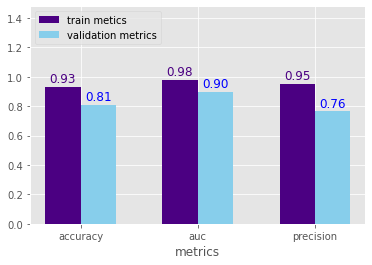

In [110]:
train_metric = [0.9340,0.9795,0.9526]
val_metric = [0.8080,0.8964,0.7642]
groups = ['accuracy','auc','precision']
X_axis = np.arange(len(groups))
max_y_lim = max(train_metric)+.50
style.use('ggplot')

plot1 = plt.bar(X_axis-0.15,train_metric,width = 0.3,label = 'train metics',color = 'indigo')
plot2 = plt.bar(X_axis+0.15,val_metric,width = 0.3, label = 'validation metrics',color ='skyblue')
for bar in plot1.patches:
  plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points',fontsize = 12,color = 'indigo')
for bar in plot2.patches:
  plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points',fontsize = 12,color = 'blue')

plt.xticks(X_axis,groups)
plt.ylim(0,max_y_lim)
plt.legend(loc='upper left')
plt.xlabel('metrics')
plt.savefig('bar_graph.png')


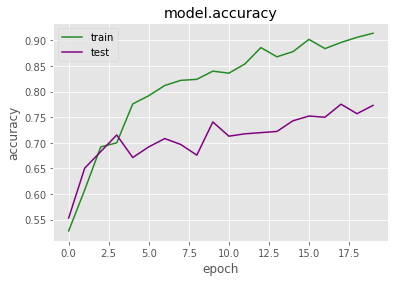

In [151]:
plt.plot(h1.history['binary_accuracy'],color = 'forestgreen')
plt.plot(h1.history['val_binary_accuracy'],color = 'purple')
plt.title('model.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.savefig('acc.png')
plt.show()

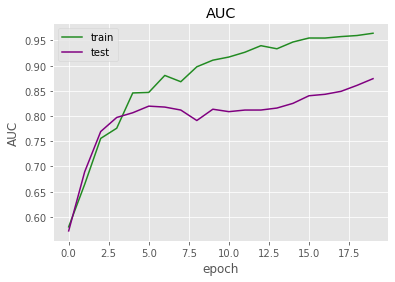

In [153]:
plt.plot(h1.history['auc'],color = 'forestgreen')
plt.plot(h1.history['val_auc'], color = 'purple')
plt.title('AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.savefig('auc.png')
plt.show()

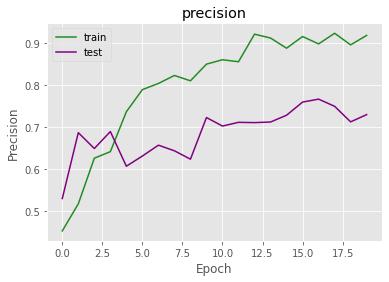

In [155]:
plt.plot(h1.history['precision'],color = 'forestgreen')
plt.plot(h1.history['val_precision'],color = 'purple')
plt.title('precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.savefig('prec.png')
plt.show()

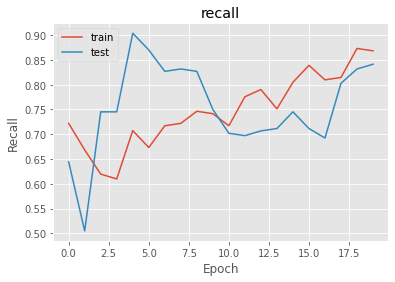

In [114]:
plt.plot(h1.history['recall'])
plt.plot(h1.history['val_recall'])
plt.title('recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
cm = confusion_matrix(y_true=test_labels,y_pred = rounded_predictions)

NameError: ignored

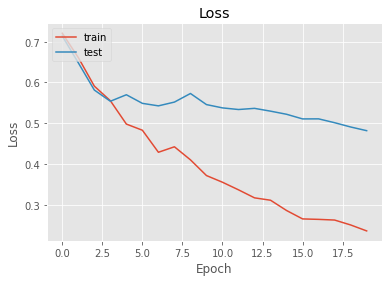

In [115]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_labels=['benign','metastatic']

In [ ]:
TEST_LOCATION = '/content/gdrive/MyDrive/research/Test_data/validation_classes'

In [ ]:
test_df = pd.read_csv('/content/gdrive/MyDrive/research/Test_data/red_test_labels.csv')

In [ ]:
test_labels = []
labels = test_df['Label'].to_list()

In [ ]:
print(test_df)

                                           Id  Label
0    7d5436dc9827c7c9872e995cb82837afb61a8646      0
1    4593a0a79df0a7b891e9b018f02a468634c51ef8      0
2    01ae5a9b1b1b6308de423e7f0cb82b4134c9ca80      0
3    639aa5b8627a502b6d62f31f9527f470f5df13e9      1
4    d1eee2f644d56ef9897e582194b2e3bf63d03622      0
..                                        ...    ...
495  271df50a6c7f3d2e2a0ab174ffe57a0a13cf2aea      0
496  164cfa0398650ca0e8193077bfbe52f31548d870      1
497  9cdf8f728a286084a7be4e770ed77286d4ed4fa7      1
498  578c2c2dddc52afd0c49d6f77d2e2db010add85b      1
499  9aad90eba3931634e8e5143fec34a0e1aaed6b39      1

[500 rows x 2 columns]


In [156]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
!pip install netron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.4 MB/s eta 0:00:00


In [163]:
classifier.save('/content/gdrive/MyDrive/firn.h5')

In [162]:
import keras
keras.analyzeNetwork(classifier)

AttributeError: ignored